<a href="https://colab.research.google.com/github/eldadHaber/CompGeo2023/blob/main/Lecture1_Into2Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import math


In [2]:
# Arrays/Tensors and indexing
a0 = torch.tensor([])
a1 = torch.zeros(5)
a2 = torch.zeros(5, 6)
a3 = torch.zeros(4, 5, 6)

print(a0.shape, a1.shape, a2.shape, a3.shape)


torch.Size([0]) torch.Size([5]) torch.Size([5, 6]) torch.Size([4, 5, 6])


In [3]:
# Special tensors
ZeroTen = torch.zeros(2,3,4,5)
OneTen  = torch.ones(2,1,4,5)
RandTen = torch.randn(2,1,4,5)  # or rand

# Initializing tensor with some numbers
A = torch.tensor([[1.0,2,3],[4,5,6]])
print(A)
print(A.shape)

tensor([[1., 2., 3.],
        [4., 5., 6.]])
torch.Size([2, 3])


In [4]:
# changing/adding dimension
A = A.unsqueeze(0)
print(A.shape)
A = A.squeeze(0)
print(A.shape)
A = A.unsqueeze(-1)
print(A.shape)

# Stacking tensors and repeating them
A = torch.repeat_interleave(A, 5, dim=-1)
print('shape of A after stacking', A.shape)


torch.Size([1, 2, 3])
torch.Size([2, 3])
torch.Size([2, 3, 1])
shape of A after stacking torch.Size([2, 3, 5])


In [5]:
# Access the tensor
print(A[1,2,4])

print(A[0,0,:])  # the full last dim
print(A[0,:,0])  # the full first dim
print(A[:,0,0])  # the full zero's dim



tensor(6.)
tensor([1., 1., 1., 1., 1.])
tensor([1., 2., 3.])
tensor([1., 4.])


Class activity

Generate a 4D tensor of size 5,10,15,20
where for every i, j, k we have that
A[i, :, j, k] = [0, 1,2,3,4,5,6,7,8,9]

In [6]:
# More tensor operations
n = A.numel() # Number of elements
a = A.mean()  # same as A.sum()/A.numel()
a0 = A.mean(dim=0)
a1 = A.mean(dim=1)

avec = A.flatten() # or A.view(-1)
print(A)
print(avec)

tensor([[[1., 1., 1., 1., 1.],
         [2., 2., 2., 2., 2.],
         [3., 3., 3., 3., 3.]],

        [[4., 4., 4., 4., 4.],
         [5., 5., 5., 5., 5.],
         [6., 6., 6., 6., 6.]]])
tensor([1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 4., 4., 4.,
        4., 4., 5., 5., 5., 5., 5., 6., 6., 6., 6., 6.])


In [7]:
# Accesing parts of the array
print('A = ', A)
A1 = A[1:, :, :] # or  A[1:, None, None]
print('A1 = ', A1)
A2 = A[:-1, :, :] # 
print('A2 = ', A2)

A3 = A[:, :, [1,3]]
print('A3 = ', A3)

A =  tensor([[[1., 1., 1., 1., 1.],
         [2., 2., 2., 2., 2.],
         [3., 3., 3., 3., 3.]],

        [[4., 4., 4., 4., 4.],
         [5., 5., 5., 5., 5.],
         [6., 6., 6., 6., 6.]]])
A1 =  tensor([[[4., 4., 4., 4., 4.],
         [5., 5., 5., 5., 5.],
         [6., 6., 6., 6., 6.]]])
A2 =  tensor([[[1., 1., 1., 1., 1.],
         [2., 2., 2., 2., 2.],
         [3., 3., 3., 3., 3.]]])
A3 =  tensor([[[1., 1.],
         [2., 2.],
         [3., 3.]],

        [[4., 4.],
         [5., 5.],
         [6., 6.]]])


In [8]:
# Logical operations
A = torch.randn(4,5)
T = A>0
print(T)

tensor([[ True,  True,  True,  True,  True],
        [False,  True, False, False,  True],
        [ True, False,  True,  True,  True],
        [ True,  True,  True, False, False]])


In [9]:
# Indexing with logical operations
a = torch.arange(7,7+12)
print(a)
A = torch.reshape(a, [3, 4])
print(A)

T = A>12
print(T)

B = A[T]
D = T*A
print(B)
print(D)

tensor([ 7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18])
tensor([[ 7,  8,  9, 10],
        [11, 12, 13, 14],
        [15, 16, 17, 18]])
tensor([[False, False, False, False],
        [False, False,  True,  True],
        [ True,  True,  True,  True]])
tensor([13, 14, 15, 16, 17, 18])
tensor([[ 0,  0,  0,  0],
        [ 0,  0, 13, 14],
        [15, 16, 17, 18]])


Class activity

Generate a random tensor $A$ os size $10 \times 11 \times 12$.
Find the location of all the entries that are bigger than $0$.
Return a tensor with $0$ on these locations
and the origianl number otherwise

In [10]:
# More special arrays
x = torch.arange(4)
print('x = ', x)
y = torch.arange(5)
print('y = ', y)

[X, Y] = torch.meshgrid(x,y)
print('X = ',X)
print('Y = ',Y)


x =  tensor([0, 1, 2, 3])
y =  tensor([0, 1, 2, 3, 4])
X =  tensor([[0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2],
        [3, 3, 3, 3, 3]])
Y =  tensor([[0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4]])


/usr/local/lib/python3.8/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [11]:
# Array operation
Z = X*Y         # Pointwise multiplication
Z = (X**2)*Y
Z = torch.sin(X)*torch.cos(Y)
Z = torch.abs(X)

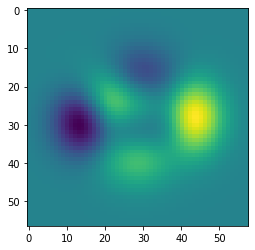

In [12]:
# Example - generating the matlab function
x = torch.arange(57)
y = torch.arange(58)
# Make them from -3,3
x = 6*((x/x.max())-0.5)
y = 6*((y/y.max())-0.5)

[X, Y] = torch.meshgrid(x,y)

Z =  3*(1-X)**2 * torch.exp(-(X**2) - (Y+1)**2) \
  - 10*(X/5 - X**3 - Y**5)*torch.exp(-X**2-Y**2) \
   - 1/3*torch.exp(-(X+1)**2 - Y**2)

plt.imshow(Z)

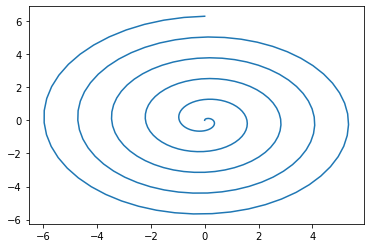

In [13]:
# More plotting
x = torch.linspace(0,2*np.pi, 257)
u = x*torch.sin(5*x)
v = x*torch.cos(5*x)

plt.plot(u,v)

In [14]:
# loops
A = torch.rand(6,2,3)
for i in range(5):
  A[i+1, :, :] = A[i, :, :]*A[i+1, :, :]

print(A)

tensor([[[2.8667e-01, 6.0383e-02, 7.1158e-01],
         [8.0774e-01, 3.1776e-01, 5.8678e-01]],

        [[2.5516e-01, 5.4448e-02, 1.5260e-01],
         [5.9220e-01, 3.2916e-02, 1.7659e-03]],

        [[2.2774e-01, 3.6538e-02, 3.9769e-02],
         [1.5841e-01, 3.2358e-02, 1.7536e-03]],

        [[4.0127e-02, 2.0139e-02, 9.4770e-03],
         [1.5391e-01, 2.2338e-03, 1.7293e-03]],

        [[2.6628e-02, 1.1533e-02, 6.6209e-03],
         [8.6008e-02, 2.1392e-03, 9.7965e-04]],

        [[2.1596e-02, 1.0270e-02, 1.0460e-03],
         [3.2519e-02, 3.4537e-04, 2.5921e-04]]])


In [15]:
# loops
A = torch.rand(8,2,3)
n = A.shape[0]
# Allocate memory for p
p = torch.zeros(n)
for i in range(n):
  p[i] = (A[i, :, :]**i).mean()

print(p)

tensor([1.0000, 0.5294, 0.2071, 0.5079, 0.0814, 0.0561, 0.1372, 0.0730])


Homework

1. Generate a random (pos and neg) tensor, $A$, of size $100 \times 100$. Find all its entries that are bigger than $m = 0.5$. What is their mean?

2. Use a loop and compute the same entries as above for m = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

3. The command torch.dot(u,v) computes the dot product between 2 1D tensors. In a single line write the dot product of A = torch.randn(3,4,5) and B = torch.randn(3,4,5)

4. Given A = torch.randn(3,4,5), compute the dot product of the A[2, :, :] and A[0,:,:]

5. (HARD) Given A = torch.randn(3,4,5), compute EVERY dot product (for i, j, k, s) of the form A[:, i, j] and A[:,k,s]  (hint, you will more than a single loop) and store it in an appropriate size tensor

6. The solution of the wave equation 
$$ u_{tt} = u_{xx} $$
is given by 
$$ u(x,t) = {\frac 12}(f(x+t) + f(x-t)) $$
where $f(x) = u(x,0)$.
If $u(x,0) = \exp(-10x^2) \sin(x)$
plot the solution for $t = 0$, $t=1$ and $t=10$

7. Plot the function 
$$ z = \exp(-10(x^2+y^2))\sin(2\pi x)\sin(2\pi y) $$



